In [2]:
import numpy as np
import matplotlib.pyplot as plt

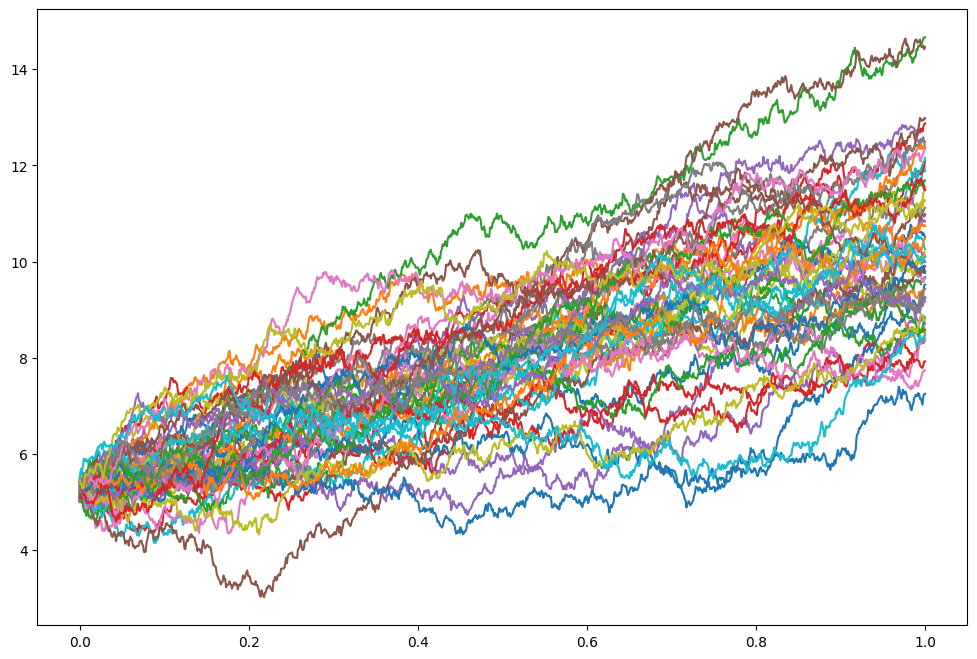

In [51]:
PATHS = 50
POINTS = 1000

def brownian_motion(paths, points, pos):
    mu, sigma = 0.0, 1.
    mu_c, sigma_c = 5.0, 2.0
    Z = np.random.normal(mu,sigma,(paths,points))
    T = 1.0
    dt = T/(points)
    
    W = np.zeros((paths, points))
    W[:,0] = [pos + dt*i*10 for i in range(paths)]
    sdt = np.sqrt(dt)
    for i in range(1,points):
        W[:,i] = W[:,i-1] + mu_c *dt + sigma_c*sdt*Z[:,i]
    return W

t = np.linspace(0.,1.,POINTS)
WW = brownian_motion(PATHS, POINTS,5)
fig, ax = plt.subplots(1,1,figsize=(12,8))
for path in range(PATHS):
    ax.plot(t,WW[path, :])
plt.show()

10.423013995280321 1.6720003474415701


(0.0, 0.5)

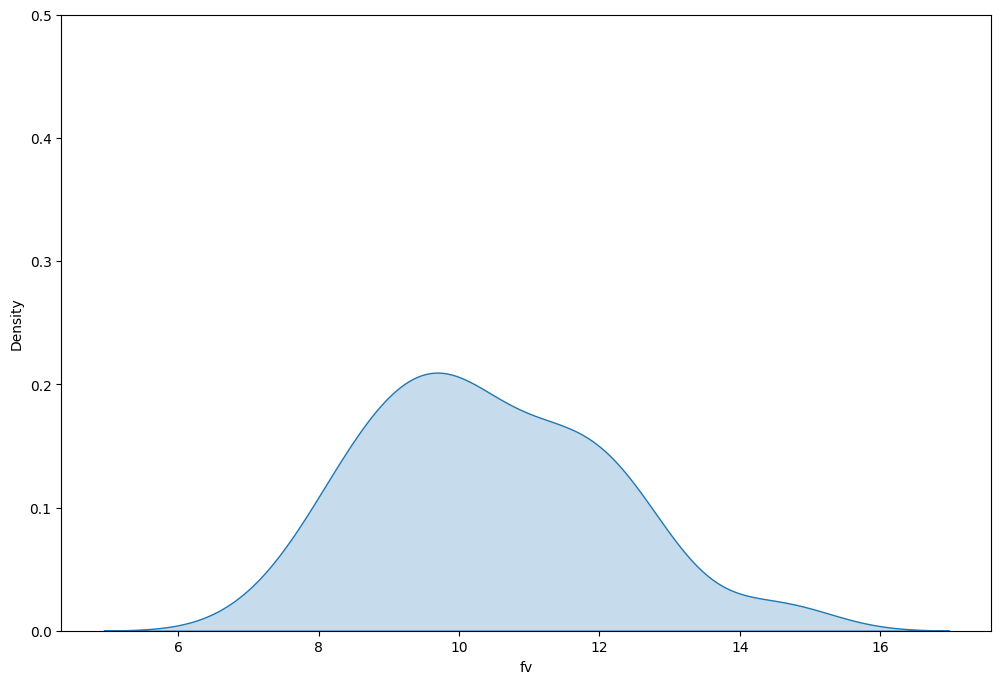

In [52]:
fv = WW[:,-1]

print(np.mean(fv),np.std(fv))
import seaborn as sb
import pandas as pd
fv = pd.DataFrame({"fv":fv})
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sb.kdeplot(fv, x ='fv',fill=True,ax=ax)
ax.set_ylim(0.0,0.5)

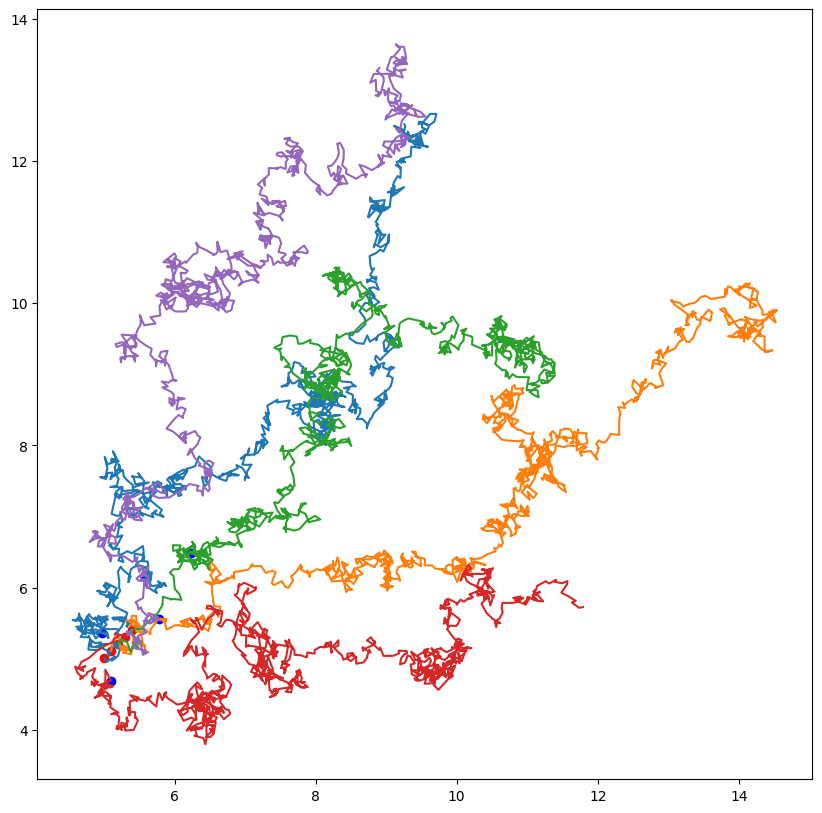

In [54]:
BB = brownian_motion(PATHS, POINTS,5)
#YY = brownian_motion(PATHS, POINTS,3)

plt.figure(figsize=(10,10))

for j in range(0, PATHS - 1, 10):
    XX = BB[j,:]
    YY = BB[j+1,:]
    plt.scatter(XX[0],YY[0],color="red")
    plt.scatter(XX[PATHS-1], YY[PATHS-1],color="b")
    plt.plot(XX,YY)


